cost function J($\theta$)
$$J(\theta) = \frac{1}{2}\sum_{i=1}^n(h_\theta(x^{(i)})-y^{(i)})^2 $$
Gradient descent
$$\theta_j = \theta_j - \alpha * \frac{\delta}{\delta\theta_j} J(\theta)$$
The update is simulataneously performed for all values of j = 0,.....d
$\alpha$ is called learning rate
This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J



#In order to implement this algorithm, we have to work out what is the partial derivative term on the righ hand side( in one training set)
$$\frac{\delta}{\delta\theta_j}J(\theta) = \frac{\delta}{\delta\theta_j}\frac{1}{2}(h_\theta(x)-y)^2$$
$$               = (h_\theta(x) - y) * \frac{\delta}{\delta\theta_j}(h_\theta(x)-y)$$ 
$$               
= (h_\theta(x) - y) * \frac{\delta}{\delta\theta_j}(\sum_{i=1}^d\theta_ix_i-y)$$
$$        =(h_\theta(x) - y)x_j$$

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import numpy as np

In [46]:
import pandas as pd

url = "http://www.openintro.org/stat/data/ames.csv"
df = pd.read_csv(url)
data = df.values
df[1:10]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


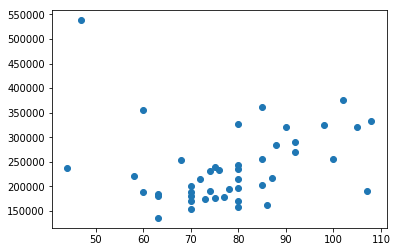

4      189900
5      195500
9      189000
10     175900
12     180400
15     538000
22     216000
36     376162
47     320000
55     216500
56     185088
58     222500
59     333168
60     355000
62     325000
63     290000
64     221000
68     215200
70     254900
72     233000
73     181000
74     205000
76     189000
79     194500
81     171000
90     190000
91     362500
92     285000
105    254000
108    130500
111    243500
114    196500
116    171000
168    155000
223    158000
226    163000
227    158900
228    328000
233    230000
244    178000
246    218000
247    236000
253    320000
257    191000
258    200500
260    161750
265    237000
266    240000
309    254900
317    174000
318    269500
319    214900
320    202900
337    136000
340    231000
Name: SalePrice, dtype: int64


In [83]:

n = 50
new_house = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2010)
price = df["SalePrice"][new_house]
lot = df["Lot.Frontage"][new_house]
bedroom = df["Bedroom.AbvGr"][new_house]
fig = plt.figure( )
ax = fig.add_subplot(111)
ax.scatter(lot,price)
#ax.scatter(bedroom,price)
plt.show()

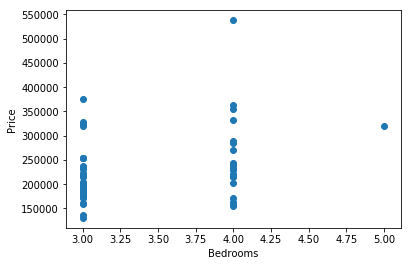

In [48]:
fig = plt.figure( )
plt.scatter(bedroom,price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

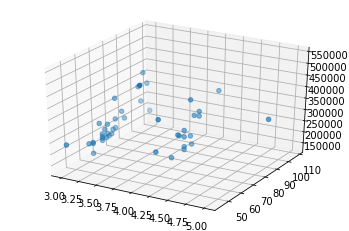

In [51]:
fig = plt.figure( )
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(bedroom,lot,price)
plt.show()

In [59]:
price[1:7],bedroom[1:7],lot[1:7]

(5     195500
 9     189000
 10    175900
 12    180400
 15    538000
 22    216000
 Name: SalePrice, dtype: int64, 5     3
 9     3
 10    3
 12    3
 15    4
 22    3
 Name: Bedroom.AbvGr, dtype: int64, 5     78.0
 9     60.0
 10    75.0
 12    63.0
 15    47.0
 22     NaN
 Name: Lot.Frontage, dtype: float64)

In [79]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
_df = pd.read_csv(url,header = None)
_df[1:10]
d = _df.values

array([21, 19, 24, 18, 19, 19, 19, 17, 16, 23, 23, 21, 21, 20, 16, 16, 15,
       47, 38, 38, 37, 31, 24, 31, 31, 31, 24, 24, 19, 49, 31, 38, 30, 30,
       30, 30, 27, 27, 27, 27, 24, 25, 24, 38, 38, 24, 15, 15, 13],
      dtype=object)

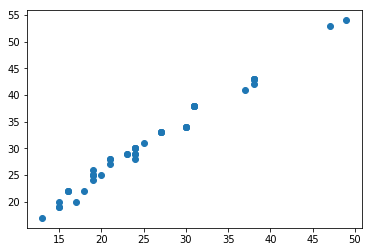

In [71]:
city_mpg, hi_mpg = 23,24
fig = plt.figure( )
ax = fig.add_subplot(111)
ax.scatter(d[1:n,city_mpg],d[1:n,hi_mpg])
plt.show( )